In [1]:
import matplotlib.pyplot as plt
from dysts.base import get_attractor_list
import dysts.flows
import math
from mpl_toolkits.mplot3d import Axes3D
import os
import sys
import torch
import tqdm

sys.path.insert(0, f'{os.path.curdir}/../')

from validyna.data import scale_trajectory_group

In [2]:
data = {}
for name in tqdm.tqdm(get_attractor_list()):
    Attractor = getattr(dysts.flows, name)
    attractor = Attractor()
    if len(attractor.ic) != 3:
        continue
    data[name] = attractor.make_trajectory(5000, resample=True, pts_per_period=500)

  2%|██▎                                                                                                    | 3/131 [00:00<00:24,  5.28it/s]/home/lstreit/anaconda3/envs/chaos/lib/python3.9/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
  5%|█████▌                                                                                                 | 7/131 [00:02<00:40,  3.05it/s]/home/lstreit/anaconda3/envs/chaos/lib/python3.9/site-packages/dysts/base.py:255: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn(
  7%|███████                                                                                                | 9/131 [00:02<00:44,  2.77it/

In [10]:
len(data)

100


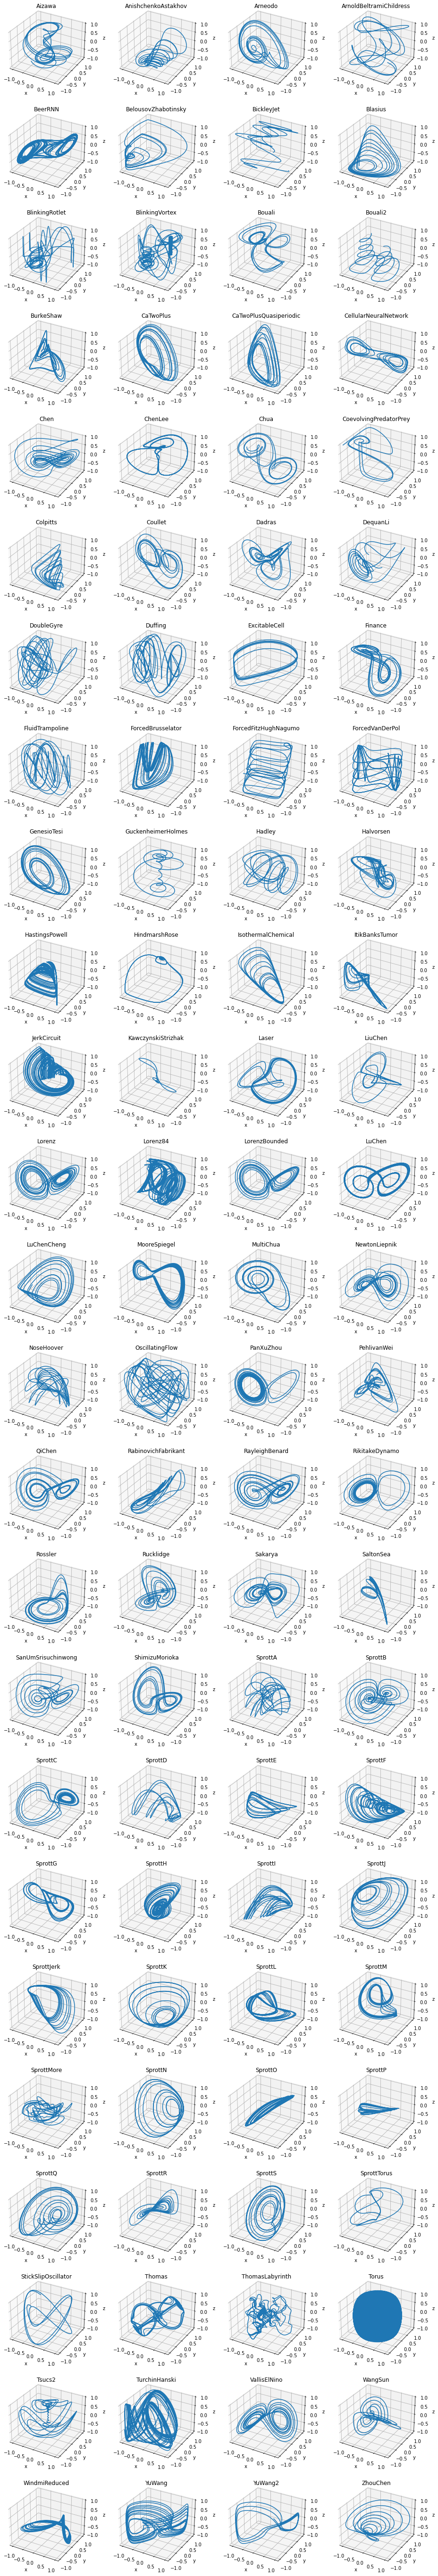

In [9]:
fig = plt.figure(figsize=(16, 100))
for i, (name, traj) in enumerate(sorted(data.items())):
    
    traj = scale_trajectory_group(torch.Tensor(traj).unsqueeze(dim=0)).numpy()[0]
    ax = fig.add_subplot(25, 4, i+1, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(name, y=1)
    ax.plot(xs=traj[:, 0], ys=traj[:, 1], zs=traj[:, 2])
fig.savefig('../../Resources/Thesis/all_3d_attractors.pdf', format='pdf', bbox_inches='tight')

In [2]:
data_fs = {}
for name in tqdm.tqdm([f'Sprott{l}' for l in ['A', 'B', 'C', 'D', 'E']] + ['Arneodo', 'Lorenz', 'Sakarya', 'QiChen']):
    Attractor = getattr(dysts.flows, name)
    attractor = Attractor()
    data_fs[name] = attractor.make_trajectory(5000, resample=True, pts_per_period=500)

100%|█████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.61it/s]


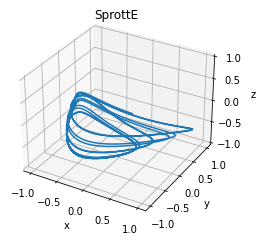

In [5]:
fig = plt.figure(figsize=(4, 4))
for i, (name, traj) in enumerate(sorted({k: v for k, v in data_fs.items() if k == 'SprottE'}.items())):
    
    traj = scale_trajectory_group(torch.Tensor(traj).unsqueeze(dim=0)).numpy()[0]
    ax = fig.add_subplot(1, 1, i+1, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(name, y=1)
    ax.plot(xs=traj[:, 0], ys=traj[:, 1], zs=traj[:, 2])
fig.savefig('../../Resources/Thesis/SprottE.pdf', format='pdf', bbox_inches='tight')

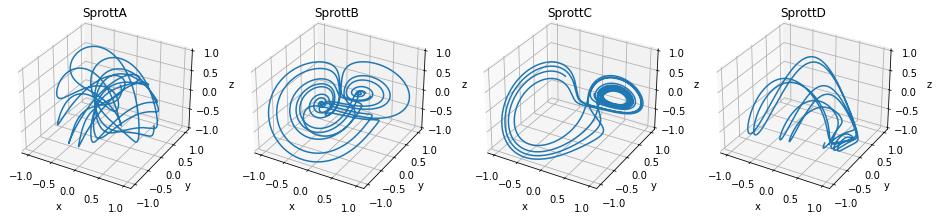

In [7]:
fig = plt.figure(figsize=(16, 4))
for i, (name, traj) in enumerate(sorted({k: v for k, v in data_fs.items() if k in [f'Sprott{l}' for l in ['A', 'B', 'C', 'D']]}.items())):
    
    traj = scale_trajectory_group(torch.Tensor(traj).unsqueeze(dim=0)).numpy()[0]
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(name, y=1)
    ax.plot(xs=traj[:, 0], ys=traj[:, 1], zs=traj[:, 2])
fig.savefig('../../Resources/Thesis/SprottE-similar.pdf', format='pdf', bbox_inches='tight')

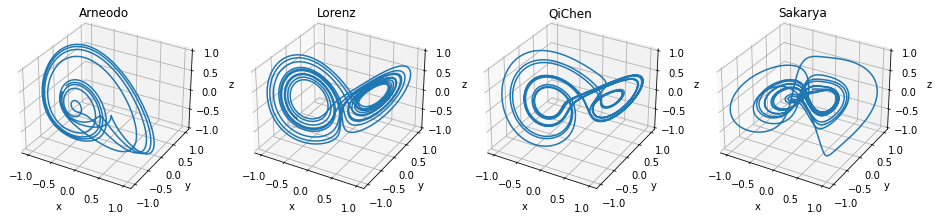

In [8]:
fig = plt.figure(figsize=(16, 4))
for i, (name, traj) in enumerate(sorted({k: v for k, v in data_fs.items() if k in ['Arneodo', 'Lorenz', 'Sakarya', 'QiChen']}.items())):
    
    traj = scale_trajectory_group(torch.Tensor(traj).unsqueeze(dim=0)).numpy()[0]
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(name, y=1)
    ax.plot(xs=traj[:, 0], ys=traj[:, 1], zs=traj[:, 2])
fig.savefig('../../Resources/Thesis/SprottE-different.pdf', format='pdf', bbox_inches='tight')